## Step 1
Download the data file clustering-tendency.csv from MyCourses. Check
that it contains 1000 vectors that are three-dimensional with all values
in the range [0, 1].

In [15]:
import pandas as pd
import numpy as np
import math

In [16]:
df = pd.read_csv("clustering-tendency.csv", header=None)
df.columns = ["d1","d2","d3"]

In [17]:
print(df.shape)
df.head(5)

(1000, 3)


,d1,d2,d3
0,0.964680,0.351274,0.298323
1,0.585918,0.800970,0.187782
2,0.509113,0.280177,0.208792
3,0.352107,0.665974,0.046316
4,0.363669,0.323479,0.219902


## Step 2
Plot the histograms of the values of each component of the data. Use
histograms with 64 bins and include the plots in your report. Identify
clearly which components (indices 0, 1, and 2) they depict.

array([[<Axes: title={'center': 'd1'}>, <Axes: title={'center': 'd2'}>,
        <Axes: title={'center': 'd3'}>]], dtype=object)

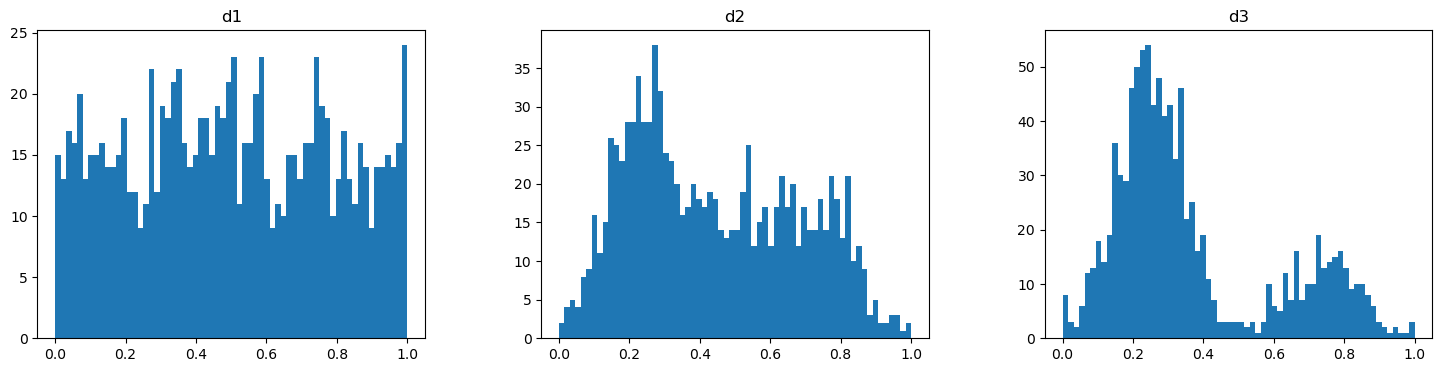

In [18]:
df.hist(bins=64, figsize=(18,4), layout=(1,3), grid = False, range=(0,1))

## Step 3
Create scatter plots of each of the three pairs of two components. Ensure that the aspect ratio of the plot axes is equal. Include the plots in
your report and identify clearly which component each axis depicts.

<Axes: title={'center': 'd1-d2 plot'}, xlabel='Dimension 1', ylabel='Dimension 2'>

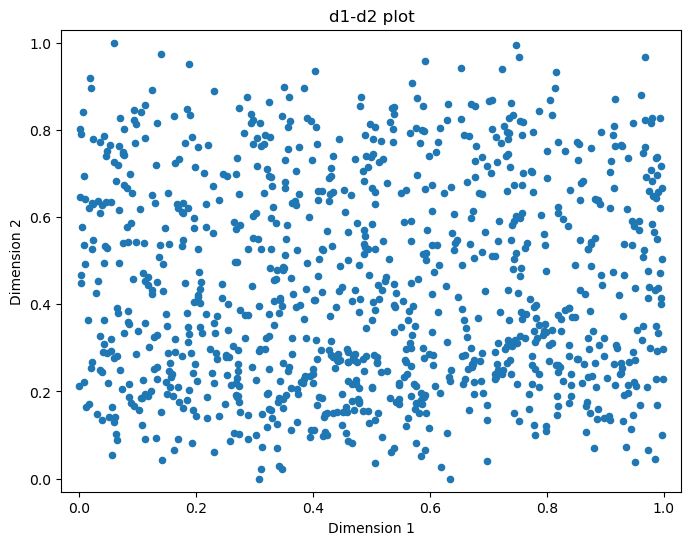

In [19]:
df.plot.scatter(x="d1", y="d2", figsize=(8,6),xlim=(-0.03,1.03),ylim=(-0.03,1.03),xlabel = "Dimension 1",ylabel = "Dimension 2", title="d1-d2 plot")

<Axes: title={'center': 'd2-d3 plot'}, xlabel='Dimension 2', ylabel='Dimension 3'>

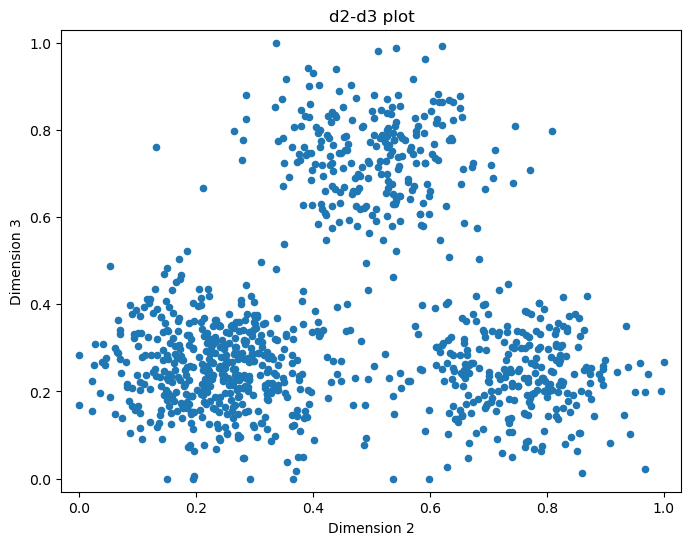

In [20]:
df.plot.scatter(x="d2", y="d3", figsize=(8,6),xlim=(-0.03,1.03),ylim=(-0.03,1.03),xlabel = "Dimension 2",ylabel = "Dimension 3", title="d2-d3 plot")

<Axes: title={'center': 'd3-d1 plot'}, xlabel='Dimension 3', ylabel='Dimension 1'>

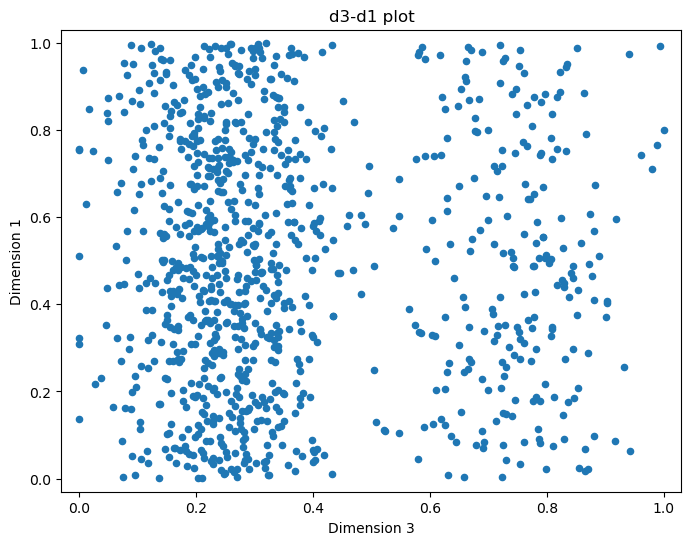

In [21]:
df.plot.scatter(x="d3", y="d1", figsize=(8,6),xlim=(-0.03,1.03),ylim=(-0.03,1.03),xlabel = "Dimension 3",ylabel = "Dimension 1", title="d3-d1 plot")

## Step 3.1 (Extra)

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

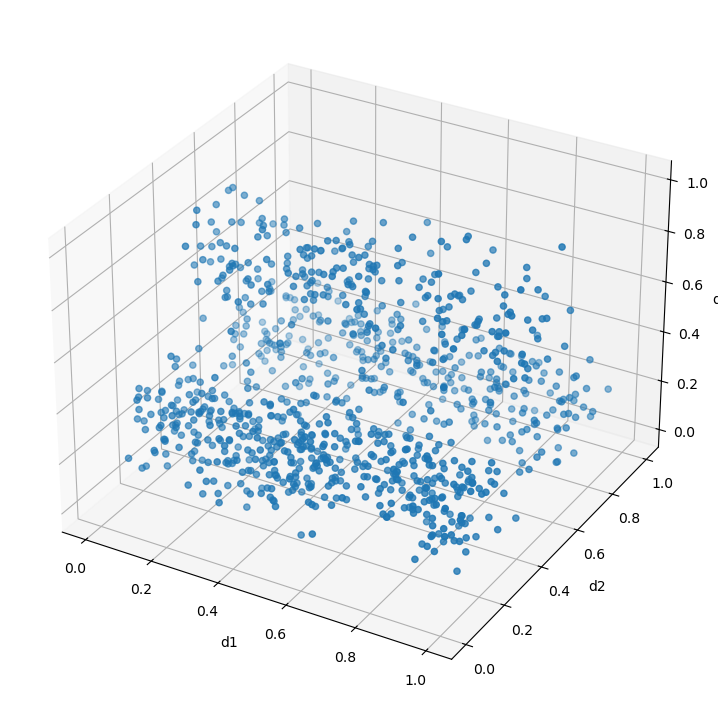

In [23]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["d1"], df["d2"], df["d3"])
ax.set_xlabel("d1")
ax.set_ylabel("d2")
ax.set_zlabel("d3")

plt.show()

## Step 5
Discretize the data with m = 64 uniform three-dimensional grid ranges
in [0, 1]3 and calculate the probability-based entropy E as defined in
equation (6.2) in Aggarwal’s book. Use the natural logarithm and
notice that 0 log 0 = 0 because lim
x→0+
x log x = 0 .


In [24]:
hist3D, _ = np.histogramdd(df.values,bins=[4,4,4], range=[(0,1),(0,1),(0,1)])
Entropies = {}

In [25]:
total = hist3D.sum()
print(df.columns)

Index(['d1', 'd2', 'd3'], dtype='object')


In [26]:
E= 0
p = hist3D.flatten()/total
for p_i in p:
    if p_i > 0:
        E += p_i * math.log(p_i)
    if p_i < 1:
        E += (1-p_i) * math.log(1-p_i)
E *= -1
print (f"Entropy: {E}")
Entropies3D = {tuple(df.columns): E}
#print(Entropies3D)
Entropies.update({0 : Entropies3D})

Entropy: 4.809280624071859


## Step 6
Repeat the above discretization with m = 64 uniform two-dimensional
grid ranges of each pair of the data dimensions in [0, 1]2
. Calculate all
three resulting entropies.


In [27]:
Entropies2D = {}
for x,y in [("d1","d2"),("d2", "d3"),("d3","d1")]:
    hist2D, _ = np.histogramdd(df[[x,y]].values,bins=[8,8], range=[(0,1),(0,1)])
    total = hist2D.sum()
    E= 0
    p = hist2D.flatten()/total
    for p_i in p:
        if p_i > 0:
            E += p_i * math.log(p_i)
        if p_i < 1:
            E += (1-p_i) * math.log(1-p_i)
    E *= -1
    Entropies2D.update({tuple([x,y]):E})
    print (f"Entropy for {x}-{y}: {E}")
#print(Entropies2D)
Entropies.update({1 : Entropies2D})

Entropy for d1-d2: 4.992978903959112
Entropy for d2-d3: 4.398183524916323
Entropy for d3-d1: 4.774745535117466


## Step 7
Finally, discretize each data dimension individually with m = 64 uniform grid ranges in [0, 1] and calculate all three resulting entropies.


In [28]:
Entropies1D = {}
for d in ["d1", "d2", "d3"]:
    hist2D, _ = np.histogram(df[d].values,bins=64, range=(0,1))
    total = hist2D.sum()
    E= 0
    p = hist2D.flatten()/total
    for p_i in p:
        if p_i > 0:
            E += p_i * math.log(p_i)
        if p_i < 1:
            E += (1-p_i) * math.log(1-p_i)
    E *= -1
    Entropies1D.update({tuple([d]):E})
    print (f"Entropy for {d}: {E}")
print(Entropies1D)
Entropies.update({2 : Entropies1D})

Entropy for d1: 5.122937260816293
Entropy for d2: 4.982823910647221
Entropy for d3: 4.723355336427211
{('d1',): 5.122937260816293, ('d2',): 4.982823910647221, ('d3',): 4.723355336427211}


## Step 9
With the readily available entropy values, simulate greedy backward
selection as a search strategy for a potentially optimal set of data dimensions with respect to clustering.

We start with a full set of features with E = 4.8. Next we drop dimension 1 as it has the highest entropy. Now E = 4.39. Now removing features only increases entropy so the optimal set is [d2,d3]

## Step 10
Similarly, simulate greedy forward selection and find a potentially optimal set of data dimensions

Now we start with zero features. We add d3 to the set becuase it has the lowest entropy. Next we add d2 to the set because it has the lowest entropy. Now the entropy increases so we are left with [d2,d3] 

## Step 11
Analyze the outcomes of the two greedy search procedures compared
to your expectations based on the visual inspection and the knowledge
on all seven calculated entropy values


Both selection methods work as expected because from the plots we can see that the d2-d3 feature set has the three clearly visible clusters while the other feature sets have less visible clusters.